Task - 1 : Restaurant Reviews

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

df = pd.read_csv("Dataset .csv")

df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

1. Analyze the text reviews to identify the mostcommon positive and negative keywords.

In [3]:
df['Rating text'].value_counts()

Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64

In [4]:
from collections import Counter

rating_texts = df['Rating text'].dropna()


In [5]:

positive_keywords = []
negative_keywords = []

for text in rating_texts:
    analysis = TextBlob(text)
    
    if analysis.sentiment.polarity > 0:
        positive_keywords.extend([text.lower()])
    elif analysis.sentiment.polarity < 0:
        negative_keywords.extend([text.lower()])


In [6]:

positive_keyword_counts = Counter(positive_keywords)
negative_keyword_counts = Counter(negative_keywords)

print("Most common positive keywords:", *positive_keyword_counts.most_common())
print("Most common negative keywords:", *negative_keyword_counts.most_common())


Most common positive keywords: ('good', 2100) ('very good', 1079) ('excellent', 301)
Most common negative keywords: ('average', 3737) ('poor', 186)


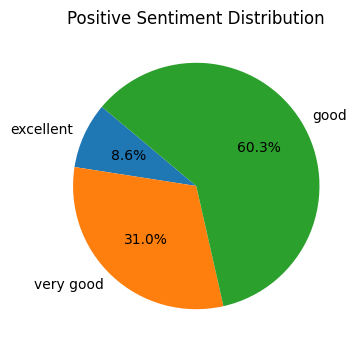

In [7]:
plt.figure(figsize=(4, 4))
plt.pie(positive_keyword_counts.values(), labels=positive_keyword_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Positive Sentiment Distribution')
plt.show()


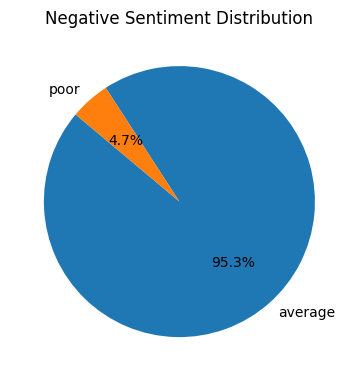

In [8]:

plt.figure(figsize=(4.4, 4.4))
plt.pie(negative_keyword_counts.values(), labels=negative_keyword_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Negative Sentiment Distribution')
plt.show()

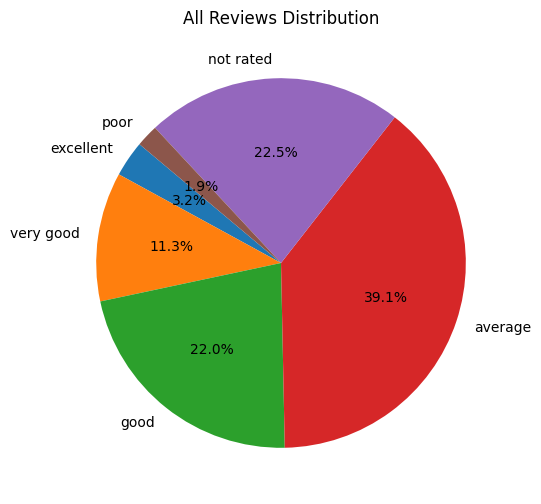

In [9]:
all_reviews = []

for text in rating_texts:
    all_reviews.extend([text.lower()])

review_counts = Counter(all_reviews)

plt.figure(figsize=(6, 6))
plt.pie(review_counts.values(), labels=review_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('All Reviews Distribution')
plt.show()

2. Calculate the average length of reviews andexplore if there is a relationship betweenreview length and rating.

In [10]:
df['Review length'] = df['Rating text'].apply(lambda x: len(str(x)))

In [14]:
average_review_length = df['Review length'].mean()

average_review_length

7.020730813527379

In [15]:
print(f"Average Review Length: {average_review_length:.2f} characters")

Average Review Length: 7.02 characters


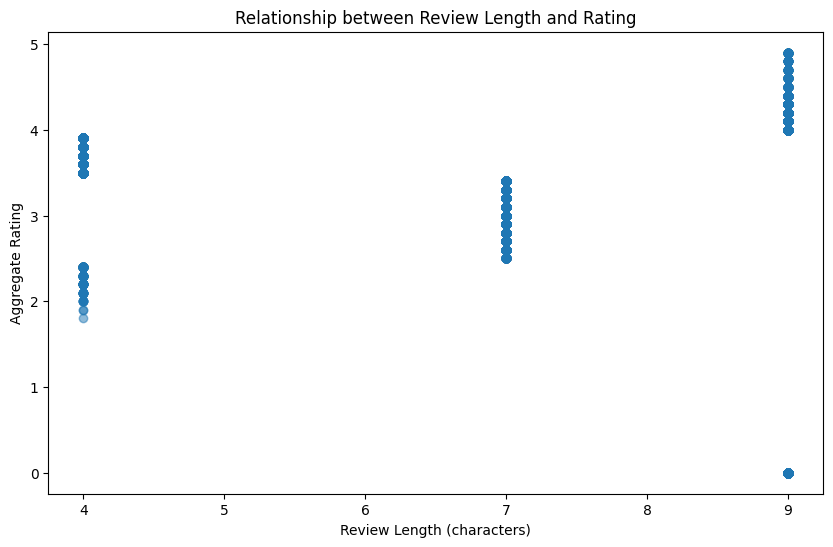

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Review length'], df['Aggregate rating'], alpha=0.5)
plt.title('Relationship between Review Length and Rating')
plt.xlabel('Review Length (characters)')
plt.ylabel('Aggregate Rating')
plt.show()